# Regiones

Una región es un grupo de pixeles conectados que comparten una propiedad en común. Las regiones son importantes en la visión por que permiten establecer el espacio que representa un determinado ente en la imágen. Por ejemplo, la región que representa una manzana en una imagen con varias frutas.



In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## Leer la imagen de ejemplo

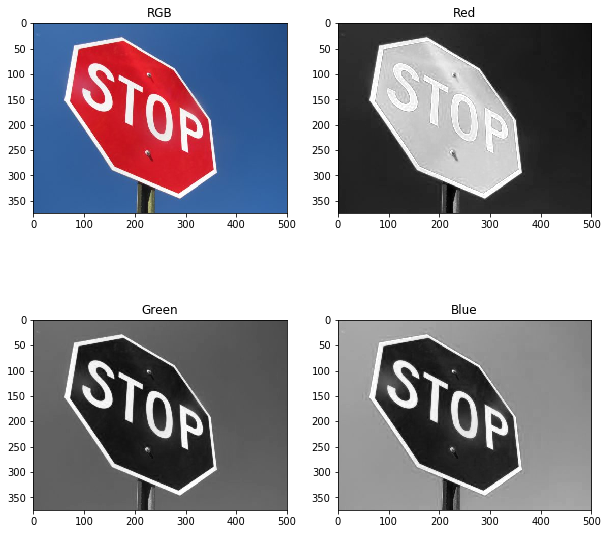

In [2]:
# Leer la imagen
image = cv2.imread('stop.jpg')

# Obtener los tres canales de la imagen
b,g,r = cv2.split(image)

# Mostrar los canales
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('RGB')

plt.subplot(2,2,2)
plt.imshow(r, cmap='gray')
plt.title('Red')

plt.subplot(2,2,3)
plt.imshow(g, cmap='gray')
plt.title('Green')

plt.subplot(2,2,4)
plt.imshow(b, cmap='gray')
plt.title('Blue')
plt.show()

## Umbralizar la imagen

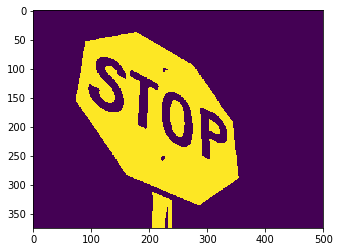

In [3]:
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(b,(5,5),0)
ret3, mask = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv)

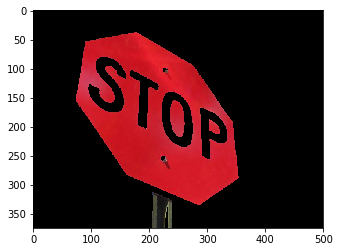

In [4]:
img2_fg = cv2.bitwise_and(image, image ,mask = mask_inv)
plt.imshow(cv2.cvtColor(img2_fg, cv2.COLOR_BGR2RGB)) 

## Estimar los componentes conectados

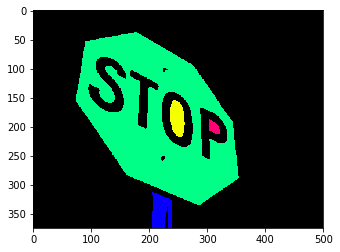

In [5]:
ret, labels = cv2.connectedComponents(mask_inv)

# Map component labels to hue val
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

plt.imshow(labeled_img)


Bastante bien, sin embargo ese letrero no se ve bien con los tornillos. Como ejercicio deberás de eliminar los tornillos utilizando operaciones morfológicas.

In [ ]:
# TODO Eliminar los tornillos de letrero